# Section 23: Python for Machine Learning - Recommender Systems

### Recomender Systems Theory

In [65]:
## ---------- Reading: Recommender Systems by Janner and Zanker -> Great Textbook 

## Fully developed and deployed RS is very complex and resource intensive. 

## Types of recommender systems:
## 1- Content based - > Focus on the attributes of the items and give you recommendations based on the similarity
##                      between items.

## 2- Collaborative based - > Produces recommendations based on the knowledge of users attitudes towards items.
##                        - > Uses wisdom of the crowd to recommend items.

## --------------------------------------------------------------------------------

## CF - More commonly used than CB systems -> Give better results and are relatively easier to understand 
##      (Implementation-wise)
##    - The algorithm has the ability of doing feature learning on its own. It can start to learn by itself which
##      features to use. 
##    - Can futher be divided into two categories:
##         - 1. Memory-Based CF -> Uses cosine similarity 
##         - 2. Model-Based CF -> Uses SVD  

### Recommender Systems with Python 

In [66]:
### In this lecture we are going to create an item similarity recommendation system for movies. 
import numpy as np 
import pandas as pd 

## Getting the data 
column_names = ['user_id', 'item_id', 'rating', ' timestamp']
df = pd.read_csv('u.data', sep='\t', names = column_names) ##sep -> Tab separated file

In [67]:
## MovieLens Dataset 
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [68]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head() ##Correlation between item id and movie title
                    ##Connection between the two data frames. 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [69]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [70]:
### Lets explore the data 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

sns.set_style('whitegrid')

In [71]:
### Lets create a Rating DataFrame with average ratings and number of ratings: 

### Keep in mind that ratings may be based on only a few people

df.groupby('title')['rating'].mean().sort_values(ascending = False).head() 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [72]:
###Then , now lets group by the movies with the most ratings 

df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [73]:
### Lets put the above in a df 
ratings = pd.DataFrame(df.groupby('title')['rating'].mean()) 

###Now lets compare the rating vs the number of ratings 
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count()) 

In [74]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


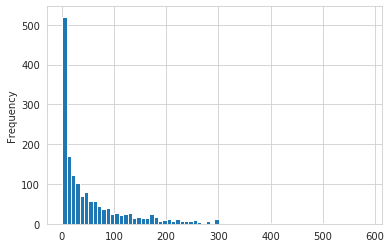

In [75]:
#### Lets further explote this with a couple of histograms: 

### Number of ratings
ratings['num_of_ratings'].plot(kind = 'hist', bins = 70)

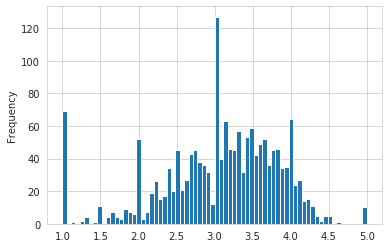

In [76]:
### Ratings 
ratings['rating'].plot(kind = 'hist', bins = 70)  ##Most people use integers to rate movies (1,2,3,4,5 stars)

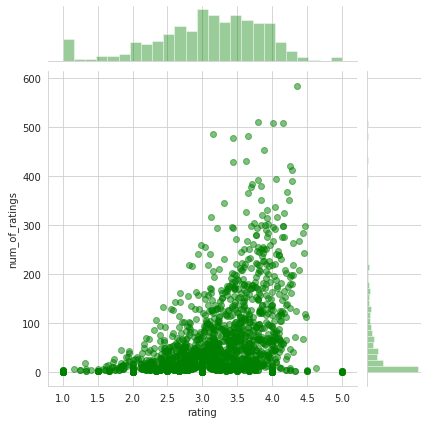

In [77]:
### We are also interested in the relationship b/w the number of ratings and the average rating 

###The better the movie, the more ratings we will get!
sns.jointplot(x = 'rating', y = 'num_of_ratings', data = ratings, alpha = 0.5, color = 'green')

In [78]:
### Building the RS 

### Creating a matrix of user_id's  and movie_titles -> Each element will consist of the rating each user gave to
### that movie. 

### Lets do this by using a pivot table:

movie_mat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [79]:
movie_mat ##Sparsely populated!

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
###Most rated movies
ratings.sort_values('num_of_ratings', ascending = False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [81]:
### Lets get the use of some of these movies: 

starwars_user_ratings = movie_mat['Star Wars (1977)']
liar_liar_user_ratings = movie_mat['Liar Liar (1997)']

starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [82]:
#### Lets use corrwith to obtain a correlation between two pandas Data Frames 

similar_to_starwars = movie_mat.corrwith(starwars_user_ratings) ###Computes pairwise correlation between rows or columns between Data Frames

/home/vick/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/vick/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [83]:
similar_to_liar_liar = movie_mat.corrwith(liar_liar_user_ratings)

In [84]:
### Lets clean the NaN values 

corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlations'])
corr_starwars.dropna(inplace = True)

In [85]:
### Tells us how correlated these movie user ratings were to the use ratings of the star wars movie
corr_starwars.head()

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [86]:
### But some results dont make sense! Some movies are perfectly correlated 
### These movies may have been seen just once and someone most likely rated Star Wars with a 5 stars 

### Lets drop such movies based on a number of ratings threshold 

corr_starwars.sort_values('Correlations', ascending=False).head(10)


,Correlations
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [87]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

,Correlations,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [88]:
## These results make much more sense! 
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlations', ascending = False)

,Correlations,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [89]:
### Now, we can see better recommendations.

### Lets try the above with Liar Liar 
corr_liar_liar = pd.DataFrame(similar_to_liar_liar, columns = ['Correlations'])

### Dropping the null values
corr_liar_liar.dropna(inplace = True)

In [90]:
corr_liar_liar = corr_liar_liar.join(ratings['num_of_ratings'])
corr_liar_liar.head()

,Correlations,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [92]:
corr_liar_liar[corr_liar_liar['num_of_ratings']>100].sort_values('Correlations', ascending = False).head()

,Correlations,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
